In [1]:
#import keras
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

import statistics
from scipy.stats import norm
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import RobustScaler


# Importing libraries for clustering analysis

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#import data
data = pd.read_csv("../MODELING TOKEN BUCET USING CLUSTERING MODELS/H264-data/nbc_news_G16B3_QP28.csv",infer_datetime_format=True,
                  parse_dates=['arrival_time'], index_col='arrival_time', 
                   names=['decoded_frame','arrival_time', 'video_frame', 
                                         'frame_size', 'x', 'y', 'z'])

In [3]:
data.head()

,decoded_frame,video_frame,frame_size,x,y,z
arrival_time,,,,,,
0.00000,0,I,8728,40.361,46.336,47.536
133.33333,4,P,968,40.109,45.879,46.911
33.33333,1,B,128,40.090,45.961,46.157
66.66667,2,B,128,40.036,46.161,46.243
100.00000,3,B,128,40.047,45.989,46.723


In [4]:
#drop decoded frame column
data.drop(('decoded_frame'), axis=1, inplace=True)

data.drop(('x'), axis=1, inplace=True)
data.drop(('y'), axis=1, inplace=True)
data.drop(('z'), axis=1, inplace=True)

In [5]:
# Label encoding of species column numerically
le = LabelEncoder()
le.fit(data['video_frame'])
print(list(le.classes_))
data['video_frame'] = le.transform(data['video_frame'])

['B', 'I', 'P']


In [6]:
data.head()

,video_frame,frame_size
arrival_time,,
0.00000,1,8728
133.33333,2,968
33.33333,0,128
66.66667,0,128
100.00000,0,128


In [7]:
#Drop NA values
data.frame_size.dropna(0,inplace= True)

In [8]:
data.reset_index(inplace=True)

In [9]:
data.head()

,arrival_time,video_frame,frame_size
0,0.00000,1,8728
1,133.33333,2,968
2,33.33333,0,128
3,66.66667,0,128
4,100.00000,0,128


In [10]:
#Sort the arrival time 

data.sort_values('arrival_time', inplace=True)
data.reset_index(drop=True, inplace=True)

In [11]:
data.head()

,arrival_time,video_frame,frame_size
0,0.00000,1,8728
1,33.33333,0,128
2,66.66667,0,128
3,100.00000,0,128
4,133.33333,2,968


In [12]:
#Check for missing values

data.isnull().sum()

arrival_time    0
video_frame     0
frame_size      0
dtype: int64

In [13]:
data = pd.DataFrame(data.frame_size)
print(data.shape)

(49521, 1)


In [14]:

mean_frame = np.mean(data.frame_size)
print(mean_frame)
peak_frame = np.max(data.frame_size)
print(peak_frame)
total_frame = np.sum(data.frame_size)
print(total_frame)

14631.91922618687
182520
724587272


In [15]:
test_split = int(len(data)*0.80)
X_train = data[:test_split]
y_train = data[:test_split]
X_test = data[test_split:]
y_test = data[test_split:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39616, 1) (39616, 1) (9905, 1) (9905, 1)


In [16]:
scaler = StandardScaler()
#fit only to the training data
scaler.fit(X_train)

StandardScaler()

In [17]:
#Now apply the transformations to the data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Selecting k value using Elbow method

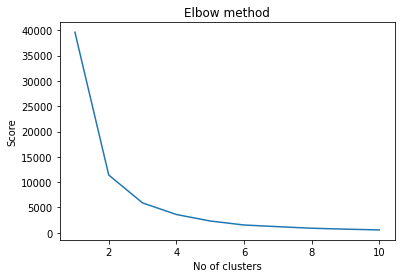

In [18]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_train, y_train)
    kmeans.fit(X_train, y_train)
    Error.append(kmeans.inertia_)
    
    
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Score')
plt.show()

# KMeans clustering model

In [19]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(X_train, y_train)

KMeans(n_clusters=3)

In [20]:
cluster_numbers = list(kmeans.labels_)

In [21]:
#Prediction
pred = kmeans.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 2])

In [22]:
# inverse scaling
X_test=scaler.inverse_transform(X_test)

# Selecting clusters

In [23]:
cluster_0 = []
cluster_1 = []
cluster_2 = []

In [24]:
for x,p in zip(X_test,pred):
  if p==0:
    cluster_0.append(x[0])
  elif p==1:
    cluster_1.append(x[0])
  else:
    cluster_2.append(x[0])

In [25]:
print(len(cluster_0))
print(len(cluster_1))
print(len(cluster_2))

6753
608
2544


In [26]:
df0=pd.DataFrame(cluster_0, columns =['cluster0_frameSize'])
df1=pd.DataFrame(cluster_1, columns =['cluster1_frameSize'])
df2=pd.DataFrame(cluster_2, columns =['cluster2_frameSize'])

In [27]:
print(np.mean(df0.cluster0_frameSize))
print(np.max(df0.cluster0_frameSize))

6363.2293795350215
20600.0


In [28]:
print(np.mean(df1.cluster1_frameSize))
print(np.max(df1.cluster1_frameSize))

83492.69736842105
156704.0


In [29]:
print(np.mean(df2.cluster2_frameSize))
print(np.max(df2.cluster2_frameSize))

35250.44968553459
63064.0


In [30]:
cluster0_mean = np.mean(df0.cluster0_frameSize)
cluster0_peakframe = np.max(df0.cluster0_frameSize)
cluster0_total = np.sum(df0.cluster0_frameSize)

cluster1_mean = np.mean(df1.cluster1_frameSize)
cluster1_peakframe = np.max(df1.cluster1_frameSize)
cluster1_total = np.sum(df1.cluster1_frameSize)

cluster2_mean = np.mean(df2.cluster2_frameSize)
cluster2_peakframe = np.max(df2.cluster2_frameSize)
cluster2_total = np.sum(df2.cluster2_frameSize)


In [31]:
def bucket_algo(df,frameSize,mean_test,peak_frame_test,total_test):
  """
  df is dataframe for frame size of every class
  frameSize is column of input df, this argument should be str type
  """
  for m in range(20):
      byte_sent = 0
      deleted_bytes = 0
      bucket_size = 0
      marked_bytes = 0
      j = 0
      l = 0
      max_bucket_size = m * peak_frame_test
      
      for i in range(df.shape[0]):
          #print(i)
          bucket_size += mean_test
          if bucket_size > max_bucket_size:
              bucket_size = max_bucket_size
              l += 1
          
          if df.loc[i, frameSize] <= bucket_size:
              byte_sent += df.loc[i, frameSize]
              bucket_size = (bucket_size - df.loc[i, frameSize])
              
          else:
              byte_sent += bucket_size
              marked_bytes += (df.loc[i, frameSize] - bucket_size)
              bucket_size = 0
              
      percent = marked_bytes * 100 / total_test
      print(percent)

In [32]:
# for class_0 
#bucket_algo
bucket_algo(df0,"cluster0_frameSize",cluster0_mean,cluster0_peakframe,cluster0_total)


100.0
30.072635742195967
28.44290084049458
27.6179553879014
26.9233848661489
26.300172239032566
25.718428607016055
25.152350801374965
24.67272709158485
24.242512877583405
23.8589974147426
23.532091230833778
23.279141309975905
23.039444145700397
22.799746981424892
22.560049817149384
22.339771812239128
22.182160694026308
22.057889841032253
21.962010975322055


In [33]:
#for class_1
# bucket algo
bucket_algo(df1,"cluster1_frameSize",cluster1_mean,cluster1_peakframe,cluster1_total)


100.0
3.7858455688334343
2.2146276104147766
1.5972398621953843
0.9798521139759957
0.550601652051199
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079


In [34]:
# for class_2
# bucket algo
bucket_algo(df2,"cluster2_frameSize",cluster2_mean,cluster2_peakframe,cluster2_total)


100.0
6.08777481589995
3.7936769010889484
3.207629969282781
2.9560862010115727
2.745116056824107
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035


In [35]:
cluster0_mean = np.mean(df0.cluster0_frameSize)
cluster0_peakframe2 = 38538.66
cluster0_total = np.sum(df0.cluster0_frameSize)

cluster1_mean = np.mean(df1.cluster1_frameSize)
cluster1_peakframe2 = 95549.33
cluster1_total = np.sum(df1.cluster1_frameSize)

cluster2_mean = np.mean(df2.cluster2_frameSize)
cluster2_peakframe2 = 110058.67
cluster2_total = np.sum(df2.cluster2_frameSize)


In [36]:
def bucket_algo2(df,frameSize,mean_test,peak_frame_test,total_test):
  """
  df is dataframe for frame size of every class
  frameSize is column of input df, this argument should be str type
  """
  for m in range(20):
      byte_sent = 0
      deleted_bytes = 0
      bucket_size = 0
      marked_bytes = 0
      j = 0
      l = 0
      max_bucket_size = m * peak_frame_test
      
      for i in range(df.shape[0]):
          #print(i)
          bucket_size += mean_test
          if bucket_size > max_bucket_size:
              bucket_size = max_bucket_size
              l += 1
          
          if df.loc[i, frameSize] <= bucket_size:
              byte_sent += df.loc[i, frameSize]
              bucket_size = (bucket_size - df.loc[i, frameSize])
              
          else:
              byte_sent += bucket_size
              marked_bytes += (df.loc[i, frameSize] - bucket_size)
              bucket_size = 0
              
      percent = marked_bytes * 100 / total_test
      print(percent)

In [37]:
# for class_0 
#bucket_algo
bucket_algo2(df0,"cluster0_frameSize",cluster0_mean,cluster0_peakframe2,cluster0_total)


100.0
28.578022902499548
27.09211360273525
25.94138941713476
24.92046132505009
24.106731648207827
23.46741544382188
23.01651443570697
22.56808688633911
22.205563003050035
21.989999226344466
21.858590651454005
21.76890514158043
21.67921963170686
21.58953412183329
21.499848611959713
21.410163102086145
21.320477592212573
21.230792082339
21.141106572465425


In [38]:
#for class_1
# bucket algo
bucket_algo2(df1,"cluster1_frameSize",cluster1_mean,cluster1_peakframe2,cluster1_total)


100.0
5.79566540706716
3.3100931175620283
2.3514636773639204
1.943609108166314
1.5671606084945013
1.190712108822691
0.8142636091508842
0.5882770239124308
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079
0.5296051879900079


In [39]:
# for class_2
# bucket algo
bucket_algo2(df2,"cluster2_frameSize",cluster2_mean,cluster2_peakframe2,cluster2_total)


100.0
4.162273435458578
3.0636007534375524
2.69541774127561
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
2.6071853931600035
